



<h1 style="font-size: 50px; color: LightSalmon;text-align: center;
"> FISH WEIGHT PREDICTION</h1>




<h1 align='center' style="font-size: 18px;"> This is a regression problem, Here we will try to predict weight of fish. </h1>

<h1 align='center' style="color:LightSalmon"> Import the Dependencies
</h1>


In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("Fish.csv")
df.sample(15)

,Species,Weight,Length1,Length2,Length3,Height,Width
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
19,Bream,650.0,31.0,33.5,38.7,14.4738,5.7276
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
22,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.shape

(159, 7)

In [5]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
df.isnull().mean()*100

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

<h1 align='center' style="color:LightSalmon">EXPLORATORY DATA ANALYSIS
</h1>



<h1 align='center' style="color:LightSalmo">UNIVARIATE ANALYSIS
</h1>

<h1 align='center' style="font-size: 18px;"> HISTOGRAM </h1>

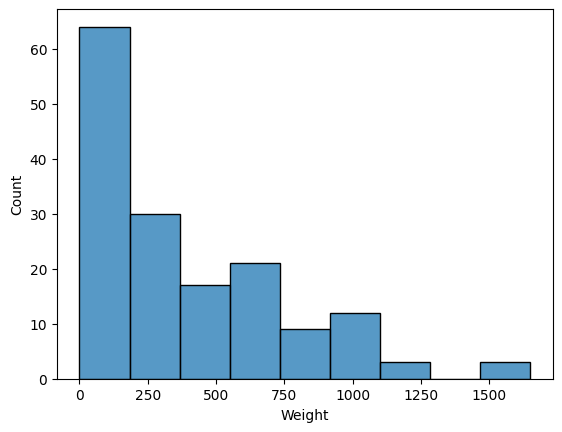

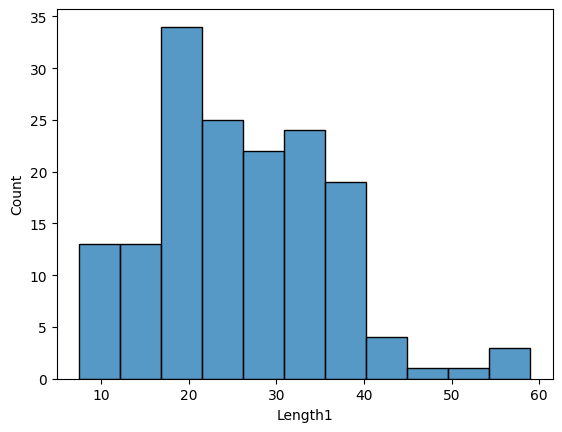

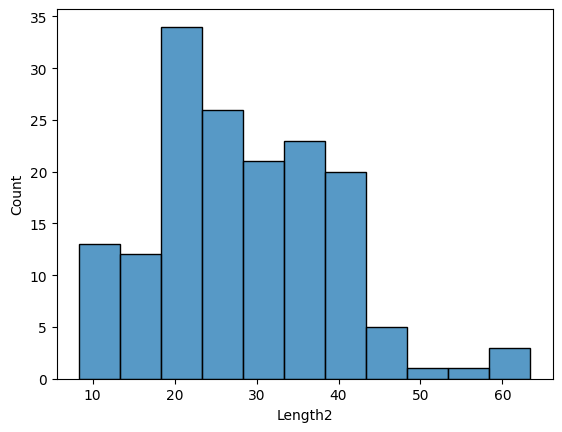

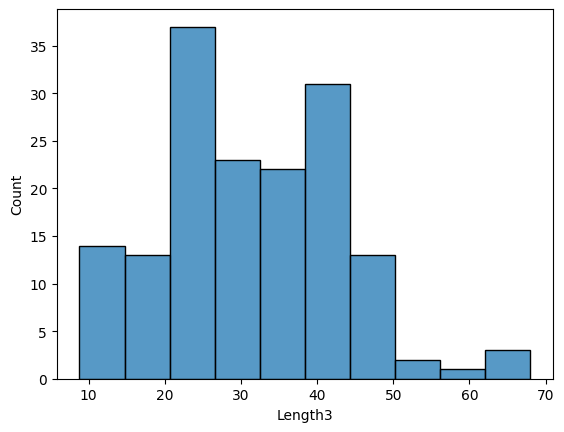

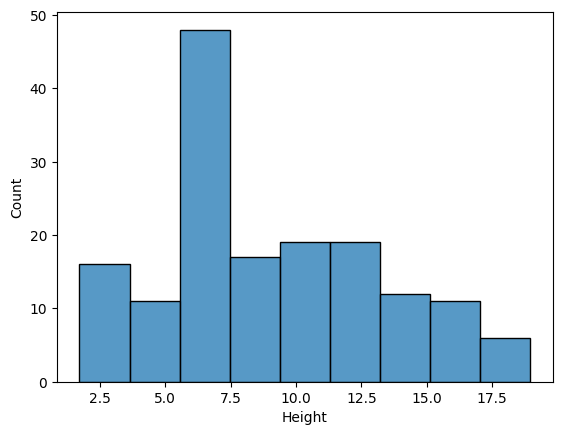

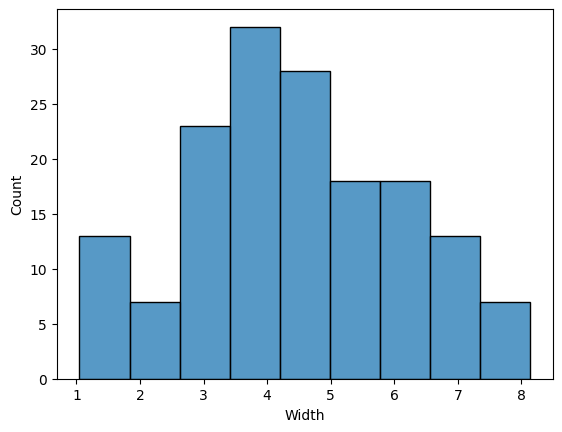

In [7]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(df[i])
        plt.show()
        

 <h1 align='center' style="font-size: 18px;"> KDE PLOT </h1>

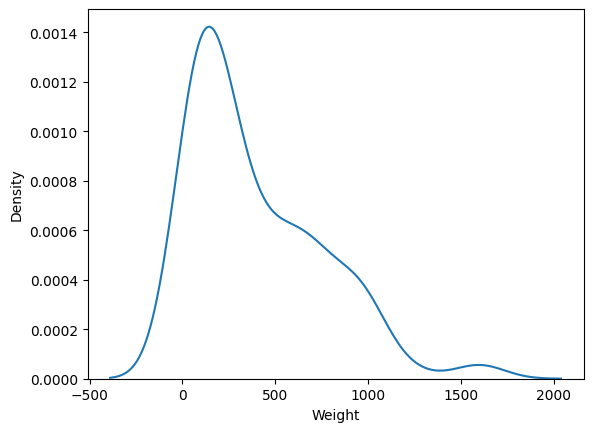

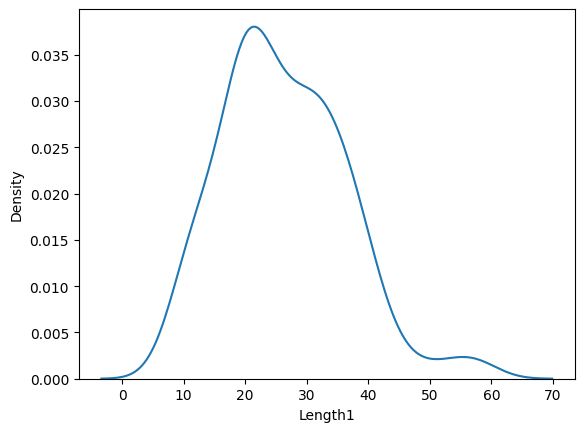

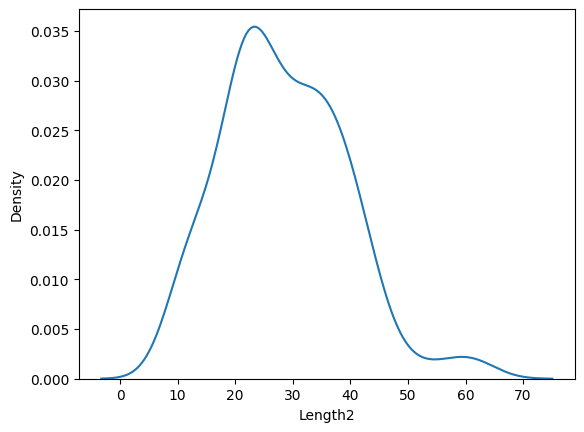

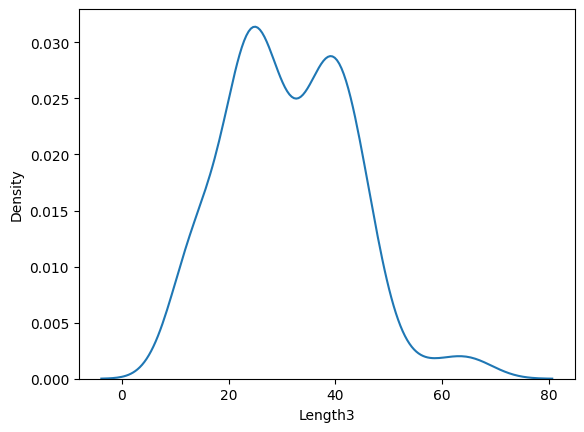

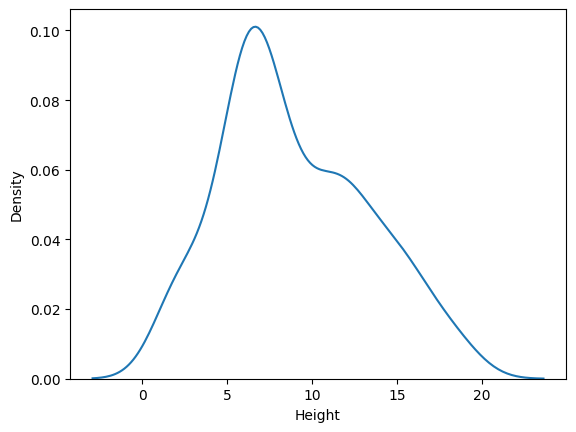

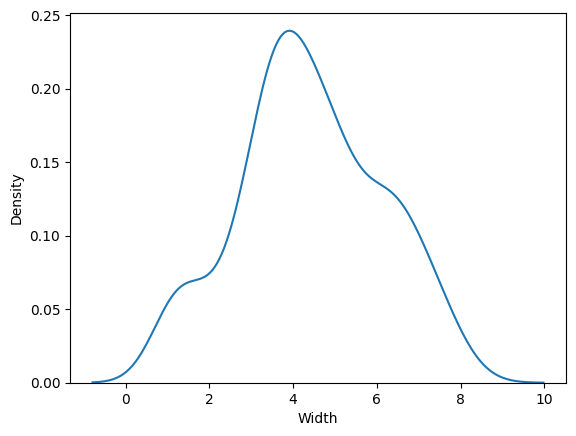

In [8]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(df[i])
    plt.show()


<h1 align='center' style="font-size: 18px;">BOX PLOT  </h1>

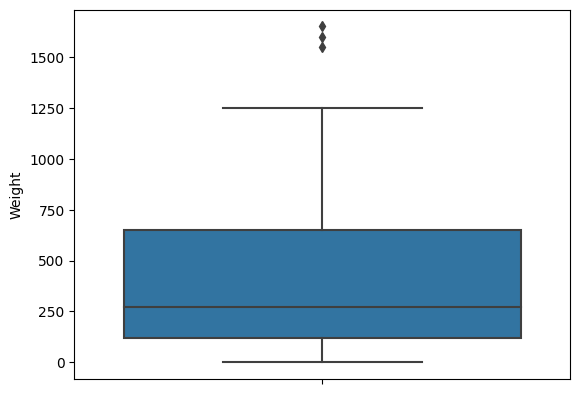

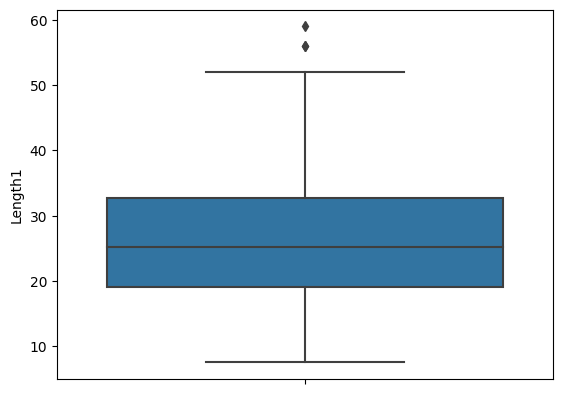

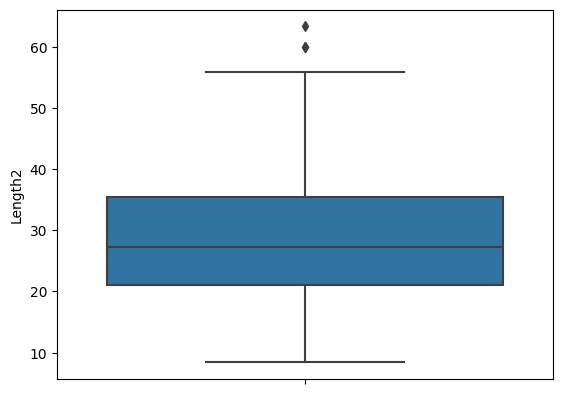

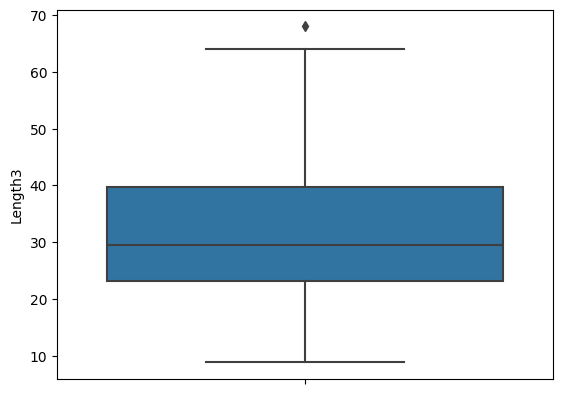

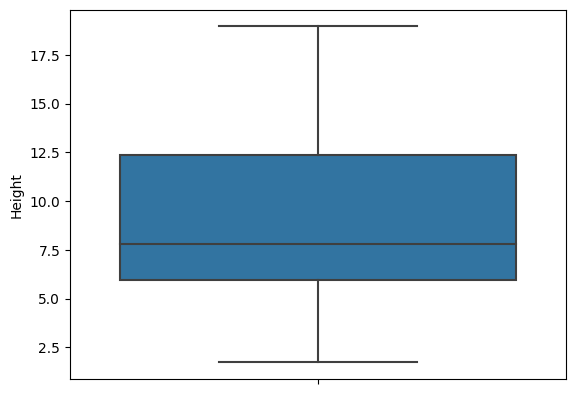

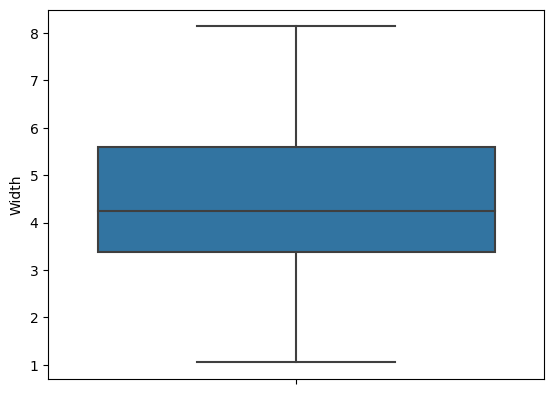

In [9]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()


<h1 align='center' style="font-size: 20px;">SET THE OUTLIERS  </h1>

In [10]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [11]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
 

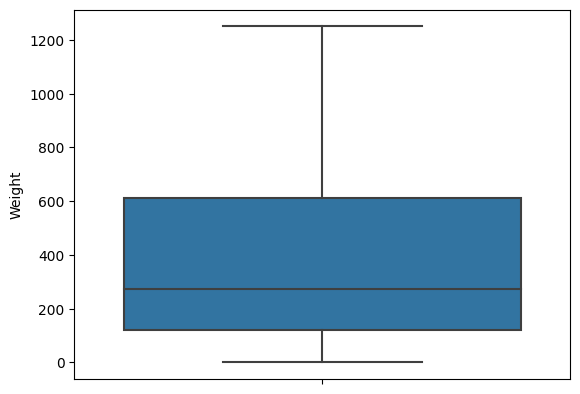

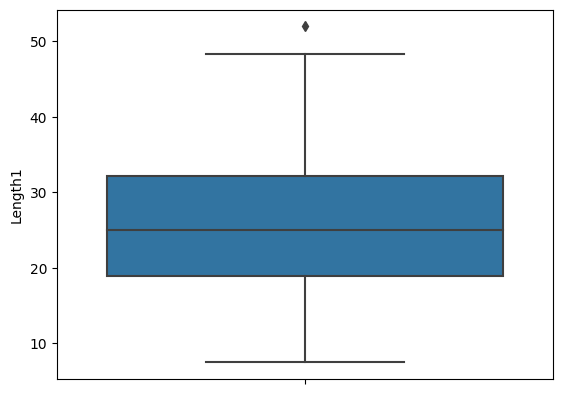

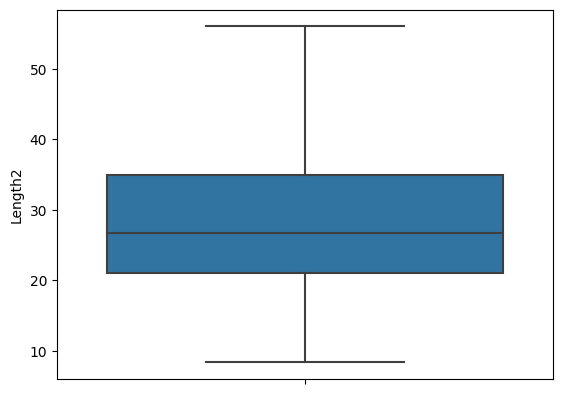

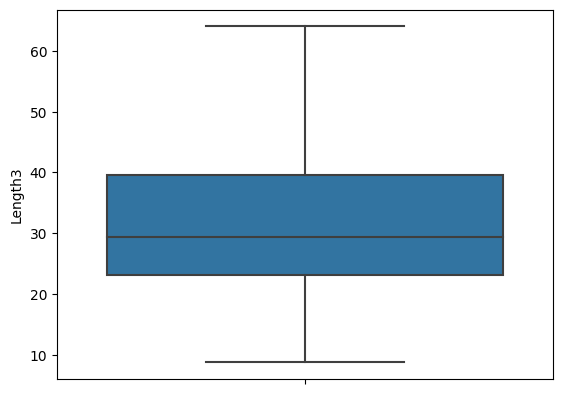

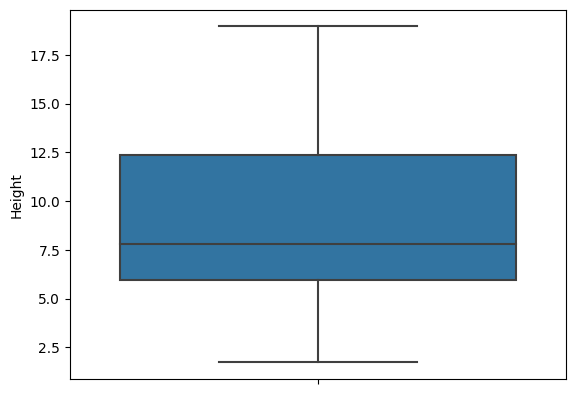

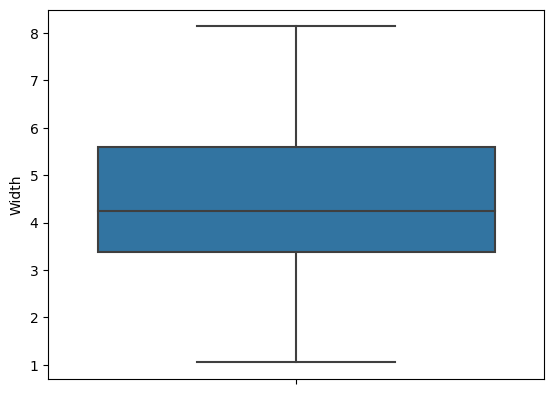

In [12]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [13]:
df.dropna(inplace=True)



<h1 align='center' style="color:LightSalmon">MULTIVARIATE ANALYSIS
</h1>


<h1 align='center' style="font-size: 25px;">BAR PLOT  </h1>

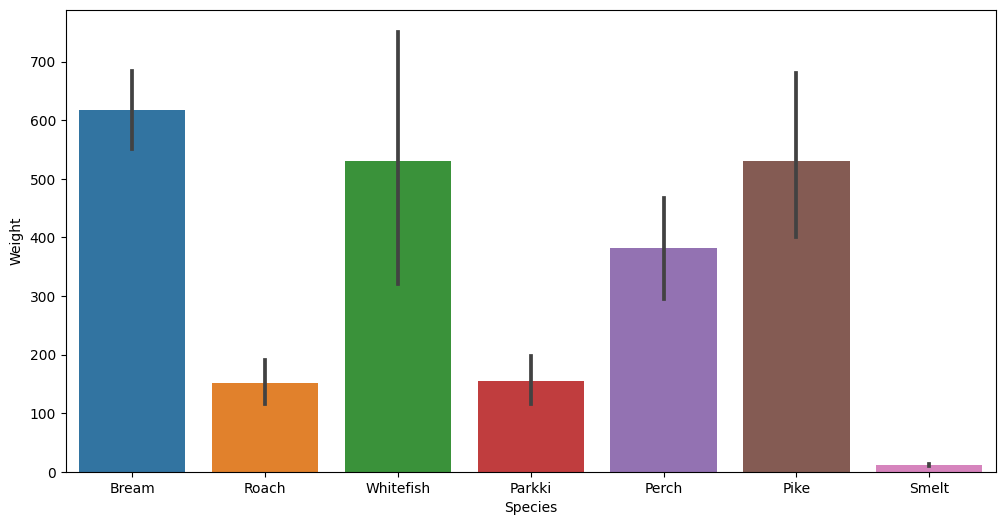

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Species", y="Weight");
 #It shows the relationship between a numeric and a categoric variable.

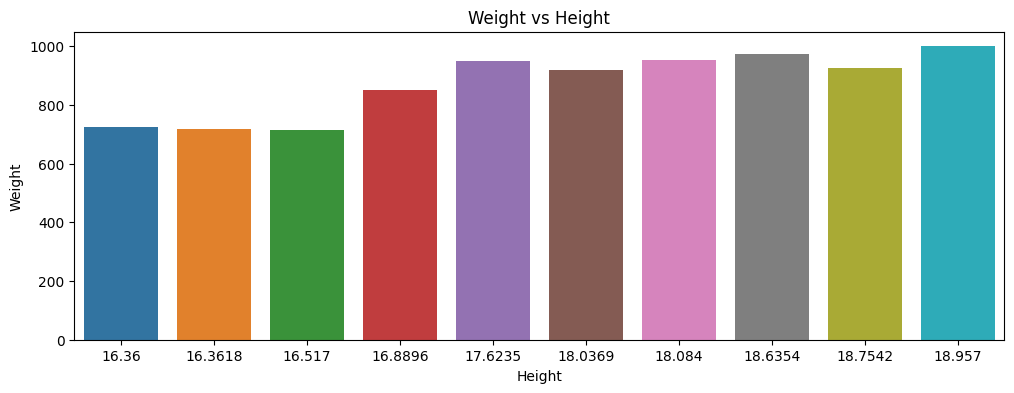

In [15]:
plt.figure(figsize=(12,4))
plt.title("Weight vs Height")
sns.barplot(x="Height" , y="Weight" , data=df.sort_values(by="Height",ascending=False)[:10]);

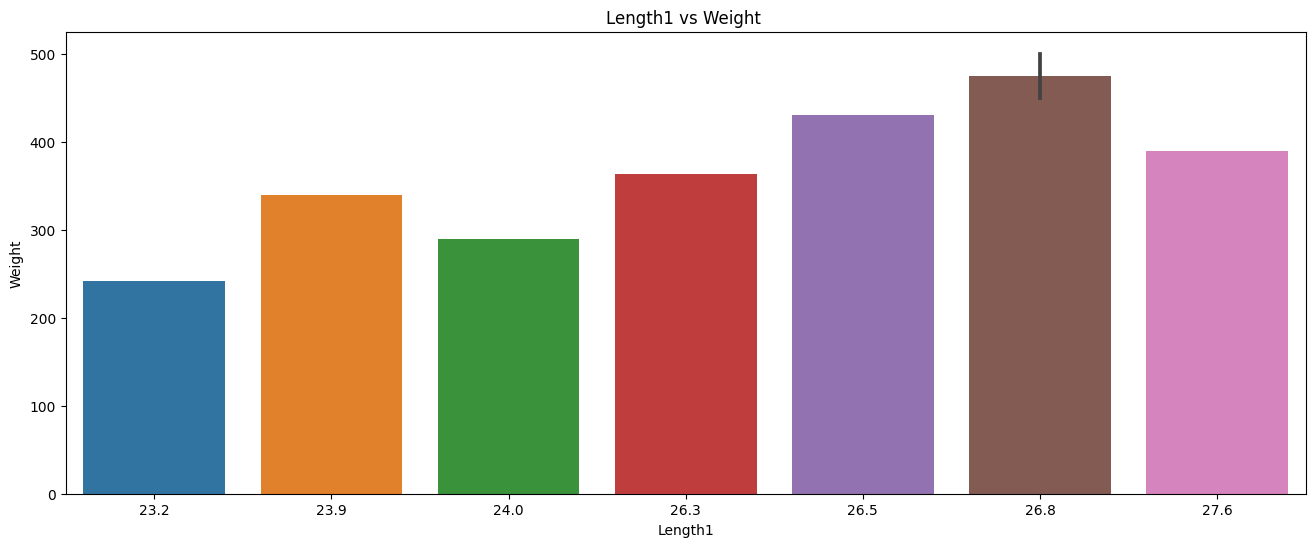

In [16]:
plt.figure(figsize=(16,6))
plt.title("Length1 vs Weight ")
sns.barplot(x="Length1" , y="Weight",data=df [:8]);


<h1 align='center' style="font-size: 25px;">SCATTER PLOT  </h1>

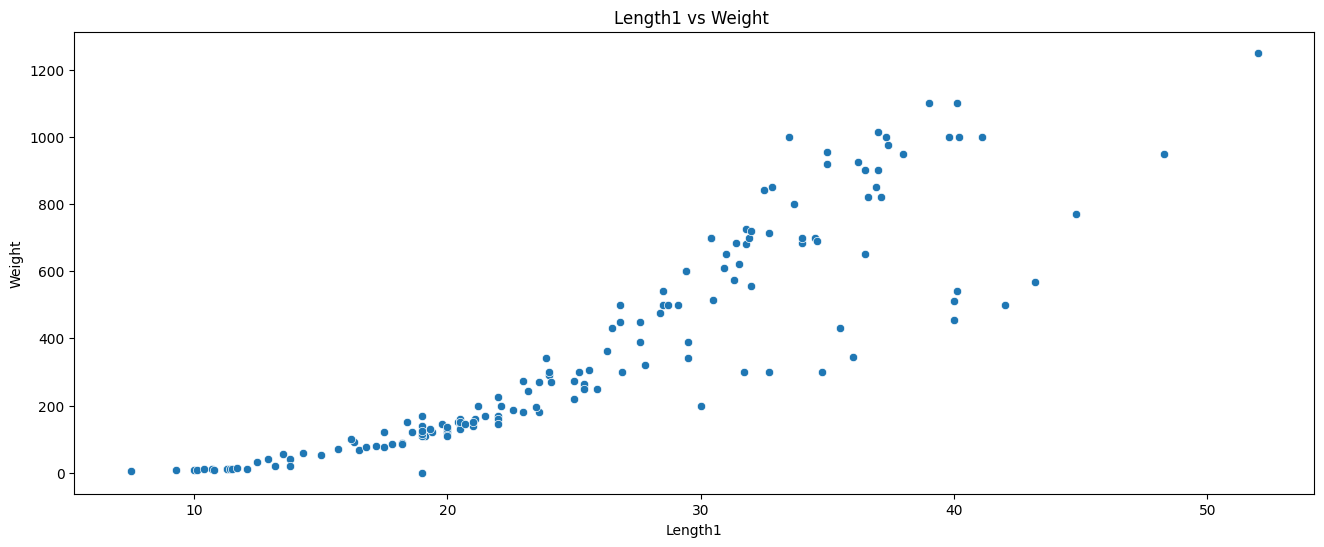

In [41]:
plt.figure(figsize=(16,6))
plt.title("Length1 vs Weight ")
sns.scatterplot(x="Length1" , y="Weight",data=df);


<h1 align='center' style="font-size: 25px;">PIE CHART  </h1>

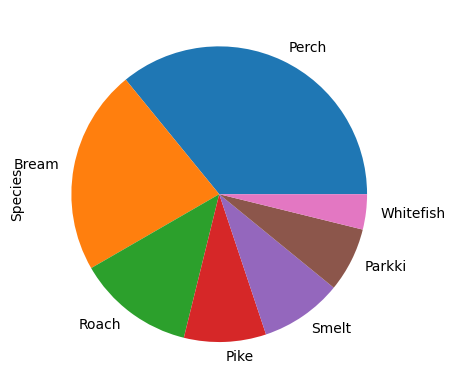

In [17]:
df.Species.value_counts().plot.pie();
 # what is a pie chart:a circle divided into parts to show the size of particular parts in relation to the whole.


<h1 align='center' style="color:LightCoral">LABEL ENCODER
</h1>
<h1 align='center' style="font-size: 18px;"> Using label encoder covert object into numerical values </h1>

In [18]:
le = LabelEncoder()

In [19]:
df['Species']=le.fit_transform(df['Species'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    int32  
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 9.1 KB



<h1 align='center' style="color:LightCoral">FIND CORRELATION
</h1>

---

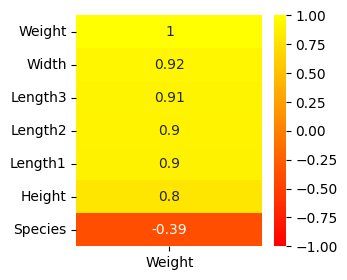

In [21]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr()[['Weight']].sort_values(by="Weight",ascending = False),vmin=-1,vmax=1,annot = True, cmap="autumn")
plt.show()

In [22]:
x = df[['Height','Length1','Length2','Length3','Width']].values

In [23]:
y = df[["Weight"]].values


<h1 align='center' style="color:LightCoral">Model Buliding Using Cross Validation
</h1>

---

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [25]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  140.2600647644252
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  139.81745724878283
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  223.818854068564
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  106.92647240328168
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  74.66073969777865
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  101.79053309749453
**********************************************



<h1 align='center' style="font-size: 30px;"> GradientBoostingRegressor has lowest RMSE value </h1>




<h1 align='center' style="font-size: 25px;"> Feature Scaling </h1>

In [26]:
sc = StandardScaler()

In [27]:
x=sc.fit_transform(x)




<h1 align='center' style="font-size: 25px;"> Splitting into training and testing </h1>

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
GBR=GradientBoostingRegressor()

In [30]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor()

In [31]:
training_score = GBR.score(x_train, y_train)
training_score

0.999244316447196

In [32]:
testing_score = GBR.score(x_test, y_test)
testing_score

0.9589775275622762

In [33]:
y_pred = GBR.predict(x)

In [34]:
output = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
output

,ACTUAL,PREDICTED
0,242.0,258.700500
1,290.0,311.362679
2,340.0,324.308352
3,363.0,364.118943
4,430.0,429.028300
...,...,...
151,12.2,13.065603
152,13.4,13.065603
153,12.2,13.065603
154,19.7,19.261456



<h1 align='center' style="color:LightCoral">VISUALIZATION
</h1>

<h2 align='center' style="font-size: 20px;">SCATTER PLOT </h2>


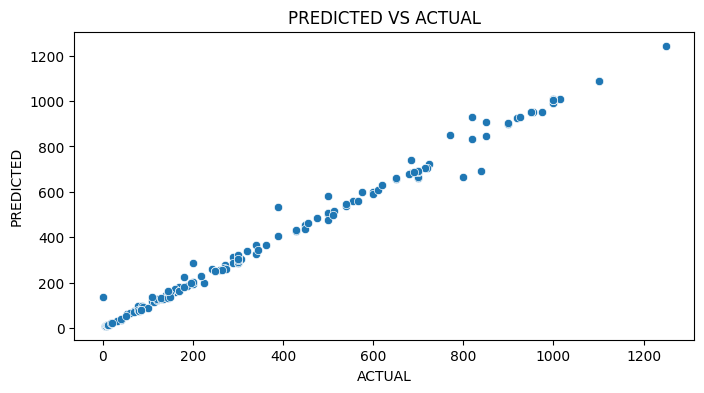

In [35]:
plt.figure(figsize=(8,4))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=output, x="ACTUAL", y = "PREDICTED");